In [1]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

# Caricamento del dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target


In [9]:
def visualize_digit(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(X_subset.iloc[index].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_subset.iloc[index]}', fontsize=14)
    plt.axis('off')
    plt.show()

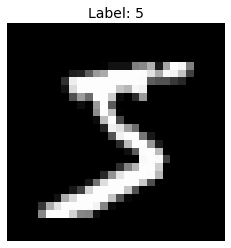

In [10]:
visualize_digit(0) 

In [3]:

# Prendiamo un sottocampione per velocizzare il calcolo
n_samples = 2000  # Usa 2000 campioni
X_subset = X[:n_samples]
y_subset = y[:n_samples]


In [4]:

# Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)


In [5]:

# PCA: riduzione a 2 dimensioni
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [6]:

# t-SNE: riduzione a 2 dimensioni
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:

# Creazione dei DataFrame per la visualizzazione
df_pca = pd.DataFrame(X_pca, columns=['Dim1', 'Dim2'])
df_pca['label'] = y_subset

df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['label'] = y_subset


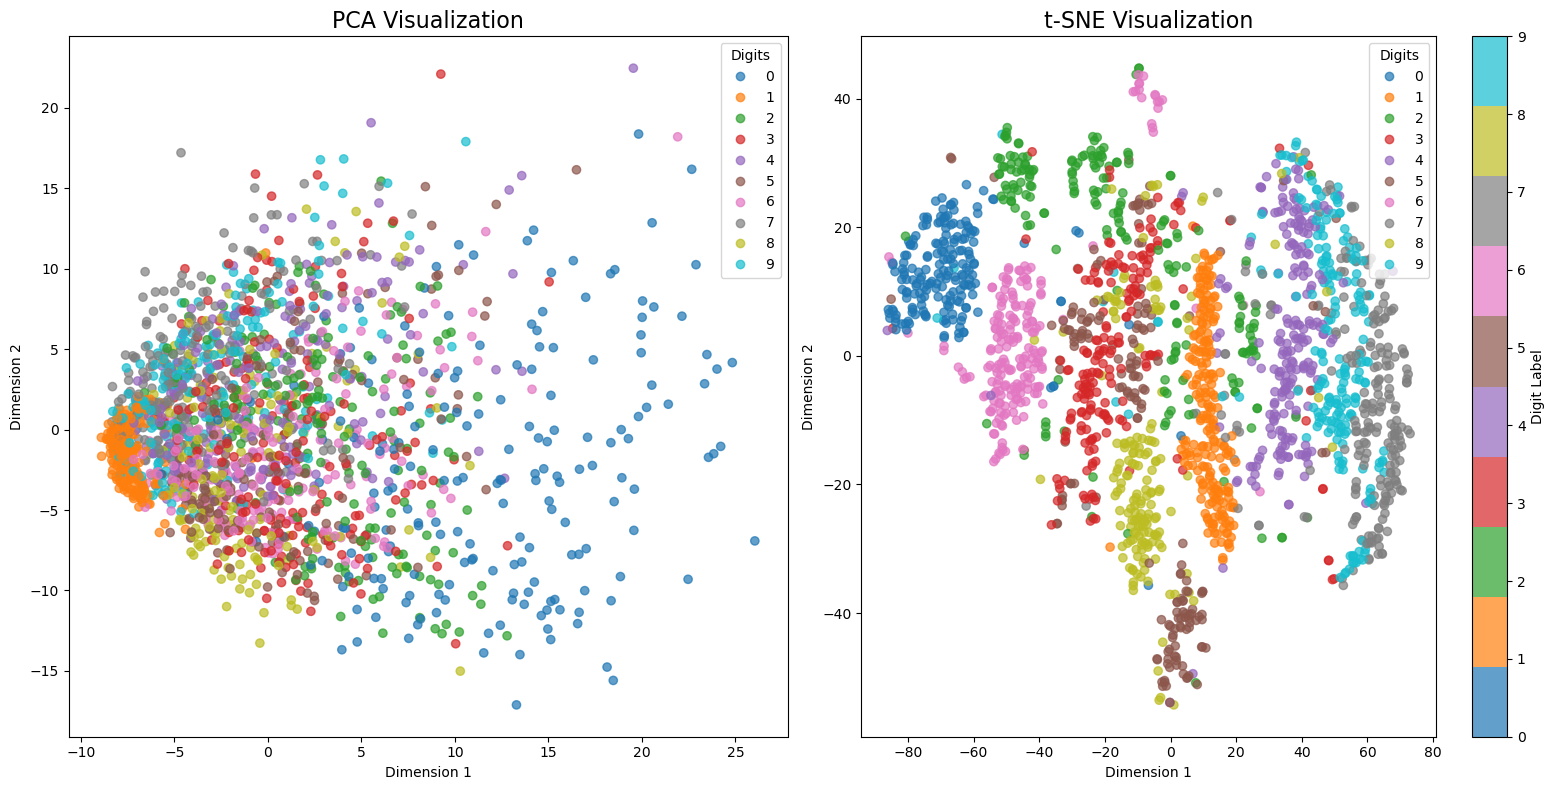

In [8]:

# Visualizzazione dei risultati
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=100)

# PCA plot
scatter_pca = axes[0].scatter(df_pca['Dim1'], df_pca['Dim2'], c=df_pca['label'].astype(int), cmap='tab10', alpha=0.7)
axes[0].set_title('PCA Visualization', fontsize=16)
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend(*scatter_pca.legend_elements(), title="Digits", loc="upper right")

# t-SNE plot
scatter_tsne = axes[1].scatter(df_tsne['Dim1'], df_tsne['Dim2'], c=df_tsne['label'].astype(int), cmap='tab10', alpha=0.7)
axes[1].set_title('t-SNE Visualization', fontsize=16)
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend(*scatter_tsne.legend_elements(), title="Digits", loc="upper right")

# Colorbar
plt.colorbar(scatter_tsne, ax=axes[1], label='Digit Label')
plt.tight_layout()
plt.show()


In [11]:
# PCA: riduzione a 3 dimensioni
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# t-SNE: riduzione a 3 dimensioni
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
def visualize_3d(data, labels, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels.astype(int), cmap='tab10', alpha=0.7)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    fig.colorbar(scatter, ax=ax, label='Digit Label')
    plt.show()

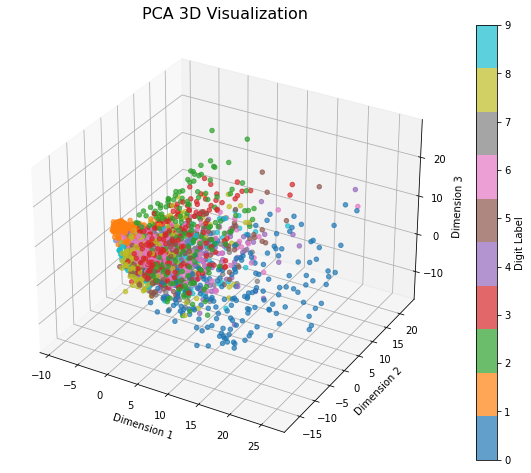

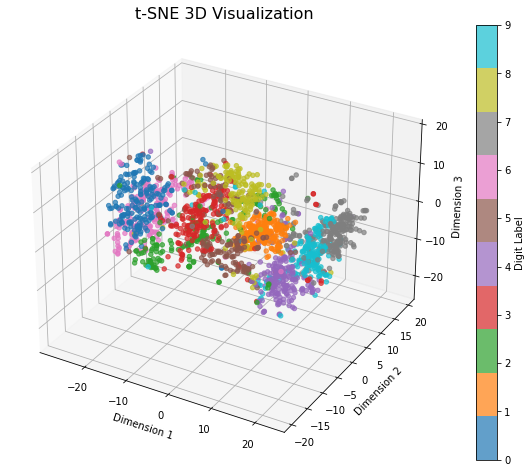

In [13]:
visualize_3d(X_pca_3d, y_subset, "PCA 3D Visualization")
visualize_3d(X_tsne_3d, y_subset, "t-SNE 3D Visualization")